In [15]:
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

input_dim = (128, 128, 3)
batch_size = 256

# Load data.
data_folder = os.path.join('combined_dataset')

data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
train_data = data_gen.flow_from_directory(
    data_folder,
    target_size=input_dim[:2],
    batch_size=batch_size,
    shuffle=True,
    classes=['imagenet', 'celeba'],
    class_mode='binary',
    follow_links=True,
    subset='training'
)
val_data = data_gen.flow_from_directory(
    data_folder,
    target_size=input_dim[:2],
    batch_size=batch_size,
    shuffle=True,
    classes=['imagenet', 'celeba'],
    class_mode='binary',
    subset='validation',
    follow_links=True
)
mapping = val_data.class_indices
type(mapping)

Found 166632 images belonging to 2 classes.
Found 41657 images belonging to 2 classes.


dict

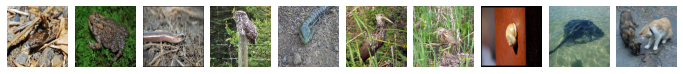

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig_size = (12., 12.)
nrows_ncols = (1, 10)
n_to_show = 10

non_faces = []

while len(non_faces) < 10:
    val_batch = next(val_data)
    for i in range(256):
        if val_batch[1][i] == 0:
            non_faces.append(val_batch[0][i])
            if len(non_faces) == 10:
                break

"""
The original dataset.
"""

fig = plt.figure(figsize=fig_size)
grid = ImageGrid(fig, 111,
                 nrows_ncols=nrows_ncols,
                 axes_pad=0.1,
                 )
# image_list = [val_batch[0][i] for i in range(n_to_show)]
image_list = non_faces

for ax, im in zip(grid, image_list):
    ax.imshow(im)
    ax.axis('off')

plt.show()

print(val_batch[1])